In [1]:
%%bash
python --version

Python 3.10.1


In [2]:
%%bash
conda env list

# conda environments:
#
                         /home/aji/anaconda2
                         /home/aji/anaconda2/envs/coevolution
base                     /home/aji/anaconda3
bmi219p                  /home/aji/anaconda3/envs/bmi219p
minipynetp               /home/aji/anaconda3/envs/minipynetp
openpyxl                 /home/aji/anaconda3/envs/openpyxl
pynetp                   /home/aji/anaconda3/envs/pynetp
pynetp3.10.0          *  /home/aji/anaconda3/envs/pynetp3.10.0
pytorch                  /home/aji/anaconda3/envs/pytorch
sciProj                  /home/aji/anaconda3/envs/sciProj
testenv                  /home/aji/anaconda3/envs/testenv
xlrd                     /home/aji/anaconda3/envs/xlrd
                         /home/aji/yes



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from pathlib import Path
from functools import partial
from typing import Any, Callable, NewType
import graphviz
import inspect
from PlotBioGridStatsLib import (
    prepare_biogrid,
    load_tip49_spec_counts_dataset,
    plot_col,
    plot_physical_experiments,
    find_idmapping_overlap,
    filter_biogrid,
    ProteinName,
    Any,
    DataFrame,
    Array
)
from sklearn.metrics import roc_curve, precision_recall_curve

In [4]:
# create a list of sets

# create a row_set

Series = NewType('Series', Any)

def get_biogrid_row_set_from_array(row : Array) -> tuple[set[ProteinName]]:
    row_set_a : set[ProteinName] = set(str(row[i]) for i in range(1, 3))
    row_set_b : set[ProteinName] = set(str(row[i]) for i in range(5, 7))
    entrez_a = row[0]
    entrez_b = row[4]
    
    synonyms_a : list[ProteinName] = row[3].split("|")
    synonyms_b : list[ProteinName] = row[7].split("|")
    
    synonyms_a = list(map(lambda i: i.upper(), synonyms_a))
    synonyms_b = list(map(lambda i: i.upper(), synonyms_b))
    
    synonyms_a = set(synonyms_a)
    synonyms_b = set(synonyms_b)
    
    row_set_a = row_set_a.union(synonyms_a)
    row_set_b = row_set_b.union(synonyms_b)
    
    row_set_a = set(row_set_a)
    row_set_b = set(row_set_b)
    
    if "-" in row_set_a : row_set_a.remove("-")
    if "-" in row_set_b : row_set_b.remove("-")


    return row_set_a, entrez_a, row_set_b, entrez_b

def get_biogrid_row_set_from_biogrid(biogrid : DataFrame) -> tuple[list[list[ProteinName]]]:
    """Parse all the protein names in a biogrid row to 
       a set of names"""
    
    names : list = ['Entrez Gene Interactor A',
                    'Systematic Name Interactor A',
                    'Official Symbol Interactor A',
                    'Synonyms Interactor A',
                    'Entrez Gene Interactor B',
                    'Systematic Name Interactor B',
                    'Official Symbol Interactor B',
                    'Synonyms Interactor B']
    
    biogrid : Array = biogrid[names].values
    
    rowlist_a = []
    rowlist_b = []
    for row in biogrid:
        row_set_a, entrez_a, row_set_b, entrez_b = get_biogrid_row_set_from_array(row)
        
        # sort the set
        row_set_a : list = [entrez_a] + sorted(row_set_a)
        row_set_b : list = [entrez_b] + sorted(row_set_b)
        
        rowlist_a.append(row_set_a)
        rowlist_b.append(row_set_b)
    
    return rowlist_a, rowlist_b

def test_rowlists(rowlist_a, rowlist_b):
    assert len(rowlist_a) == len(rowlist_b)
    
    def test_row_set(i_o, row_set_x, print_on=False):
        p = print if print_on else lambda i: None
        exceptions = []
        for name in row_set_x:
            p(name)
            if not name.isalnum():
                exceptions.append((i_o, name))
            if name.isalpha():
                assert name.isupper()
        return exceptions
    
    exceptions_a = []
    exceptions_b = []
    
    for i in range(len(rowlist_a)):
        a : set[ProteinName] = rowlist_a[i]
        b : set[ProteinName] = rowlist_b[i]
        
        new_exceptions_a = test_row_set(i, a, 
                                        print_on = False)
        new_exceptions_b = test_row_set(i, b, 
                                        print_on = False)
        
        exceptions_a += new_exceptions_a
        exceptions_b += new_exceptions_b
    
    return exceptions_a, exceptions_b

def minmaxlen(col):
    """Use to determine the max, min length of a pipe
       delimeted entry in a dataframe"""
    max_l = 0
    min_l = 1e9
    for syn in col:
        synlen = len(syn.split("|"))
        max_l = synlen if synlen > max_l else max_l
        min_l = synlen if synlen < min_l else min_l
    return max_l, min_l

In [5]:
biogrid = prepare_biogrid()

/home/aji/Projects/dev/pynet/devel/PlotBioGridStatsLib.py:126: DtypeWarning: Columns (1,2,18) have mixed types.Specify dtype option on import or set low_memory=False.
  d = load_biogrid_v4_4()


In [6]:
arr = np.array([[1, 2, 3],
                 [4, 5, 6]]) 

for r in arr:
    print(r)

[1 2 3]
[4 5 6]


In [7]:
print(minmaxlen(biogrid['Synonyms Interactor A']))

(88, 1)


In [8]:
sorted([1, 2, 9, 1, 3])

[1, 1, 2, 3, 9]

In [9]:
x = [1, 2, 3, 4, 9]
print(x)
x.reverse()
print(x)
x.reverse()
print(x)

[1, 2, 3, 4, 9]
[9, 4, 3, 2, 1]
[1, 2, 3, 4, 9]


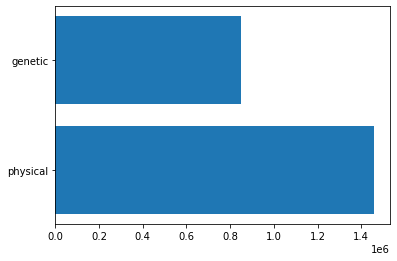

In [10]:
plot_col(biogrid,'Experimental System Type' )

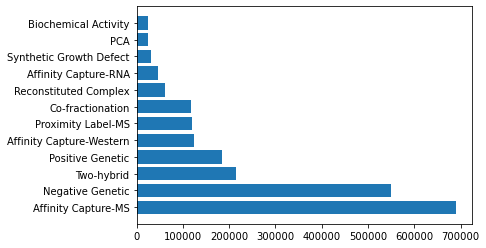

In [11]:
plot_col(biogrid, 'Experimental System', topn=12)

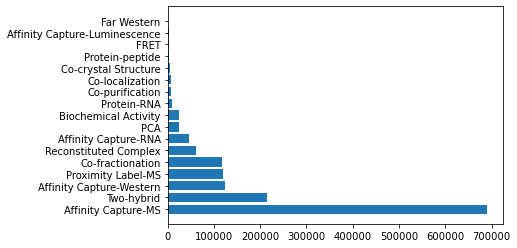

In [12]:
plot_physical_experiments(biogrid)

In [13]:
spec_counts_df = load_tip49_spec_counts_dataset()

In [14]:
find_idmapping_overlap(biogrid, spec_counts_df)

dhuman (923629, 17)
dhuman (913180, 17)
0/27 searching ACTR8
1/27 searching INO80D
2/27 searching KIAA0515
3/27 searching C20ORF20
4/27 searching C12ORF41
5/27 searching NUFIP1
6/27 searching RP11-529I10.4
7/27 searching ACTR6
8/27 searching UXT
9/27 searching INO80E
10/27 searching ACTR5
11/27 searching RUVBL2
12/27 searching TFPT
13/27 searching LIN9
14/27 searching INO80B
15/27 searching VPS72
16/27 searching SRCAP
17/27 searching INO80C
18/27 searching WDR92
19/27 searching POLR2E
20/27 searching ZNHIT1
21/27 searching ZNHIT2
22/27 searching PIH1D1
23/27 searching TP53
24/27 searching ZNHIT6
25/27 searching RUVBL1
26/27 searching H2AFZ
0/1207 searching RBM3
1/1207 searching EEF1B2
2/1207 searching RPL8
3/1207 searching TPR
4/1207 searching AP2B1
5/1207 searching LGALS3
6/1207 searching DDX18
7/1207 searching ALB
8/1207 searching DARS
9/1207 searching DMAP1
10/1207 searching H2AFX
11/1207 searching KIF11
12/1207 searching HMGB1
13/1207 searching DCTN1
14/1207 searching ZNF498
15/120

In [15]:
biogrid = filter_biogrid(spec_counts_df, biogrid)

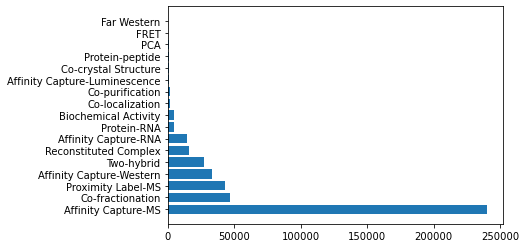

In [16]:
plot_physical_experiments(biogrid)

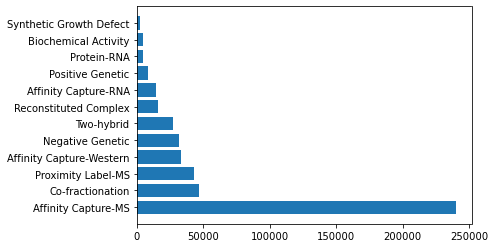

In [17]:
plot_col(biogrid, 'Experimental System')

In [18]:
spec_counts_df

,Bait,Prey,IP,Spec,ctrlCounts,SAINT,PP-NSAF,Z-score,weighted D-score
2,ACTR5,ACTR5,ARP5,417,0|0|0|0|0|0|0|0|0,1,0.697316352520067,4.93341427067021,7.32386764271932
3,ACTR5,RUVBL2,ARP5,73,6|0|1|0|0|0|0|0|0,1,0.033910239152529,-0.277434577751575,2.30143615423011
4,ACTR5,RUVBL1,ARP5,50,3|2|0|0|0|0|0|2|0,1,0.0188476130319074,-0.445655245594782,1.6953802173525
5,ACTR5,INO80C,ARP5,26,0|0|0|0|0|0|0|0|0,0.99,0.17716503039295,2.47752757446183,2.16103341761436
6,ACTR5,ACTR8,ARP5,32,0|0|0|0|0|0|0|0|0,1,0.0326314267664079,0.101163744000279,2.1299377904367
...,...,...,...,...,...,...,...,...,...
5518,ZNHIT2,ZNHIT2,ZnF.HIT2,358,0|0|0|0|0|0|0|0|0,1,0.95751746168747,5.00260255351579,13.7777734271275
5519,ZNHIT2,C20ORF4,ZnF.HIT2,4,0|0|0|0|0|0|0|0|0,0.97,1,5.00370233297676,1.7133212483779
5520,ZNHIT2,TSSC4,ZnF.HIT2,4,0|0|0|0|0|0|0|0|0,0.98,1,5.00370233297676,1.7133212483779
5521,ZNHIT2,TTC27,ZnF.HIT2,9,0|0|0|0|0|0|0|0|0,0.99,1,5.00370233297676,2.42300214615802


In [19]:
biogrid

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,Synonyms Interactor B,Experimental System,Experimental System Type,Author,Publication Source,Organism ID Interactor A,Organism ID Interactor B,Organism Name Interactor A,Organism Name Interactor B
8,663,54464,226,-,-,XRN1,ALDOA,SEP1,ALDA|GSD12|HEL-S-87p,Two-hybrid,physical,Lehner B (2004),PUBMED:15231747,9606,9606,Homo sapiens,Homo sapiens
16,1695,7916,2885,DADB-70P7.5,-,PRRC2A,GRB2,BAT2|D6S51|D6S51E|G2,ASH|EGFRBP-GRB2|Grb3-3|MST084|MSTP084|NCKAP2,Two-hybrid,physical,Lehner B (2004),PUBMED:14667819,9606,9606,Homo sapiens,Homo sapiens
18,1888,6521,22950,-,HLC3,SLC4A1,SLC4A1AP,AE1|BND3|CD233|DI|EMPB3|EPB3|FR|RTA1A|SW|WD|WD...,-,Two-hybrid,physical,Chen J (1998),PUBMED:9422766,9606,9606,Homo sapiens,Homo sapiens
22,2398,672,4436,-,-,BRCA1,MSH2,BRCAI|BRCC1|BROVCA1|FANCS|IRIS|PNCA4|PPP1R53|P...,COCA1|FCC1|HNPCC|HNPCC1|LCFS2,Two-hybrid,physical,Wang Q (2001),PUBMED:11498787,9606,9606,Homo sapiens,Homo sapiens
24,2424,672,2956,-,-,BRCA1,MSH6,BRCAI|BRCC1|BROVCA1|FANCS|IRIS|PNCA4|PPP1R53|P...,GTBP|GTMBP|HNPCC5|HSAP|p160,Two-hybrid,physical,Wang Q (2001),PUBMED:11498787,9606,9606,Homo sapiens,Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312690,3310222,283489,10459,-,RP3-330O12.4,CHAMP1,MAD2L2,C13orf8|CAMP|CHAMP|ZNF828,MAD2B|POLZ2|REV7,Affinity Capture-Western,physical,Hara K (2017),PUBMED:28887307,9606,9606,Homo sapiens,Homo sapiens
2312692,3310224,983,126353,-,-,CDK1,MISP,CDC2|CDC28A|P34CDC2,C19orf21,Biochemical Activity,physical,Maier B (2013),PUBMED:23574715,9606,9606,Homo sapiens,Homo sapiens
2312695,3310227,126353,22919,-,-,MISP,MAPRE1,C19orf21,EB1,Affinity Capture-Western,physical,Maier B (2013),PUBMED:23574715,9606,9606,Homo sapiens,Homo sapiens
2312696,3310228,1639,126353,-,-,DCTN1,MISP,DAP-150|DP-150|P135,C19orf21,Affinity Capture-Western,physical,Maier B (2013),PUBMED:23574715,9606,9606,Homo sapiens,Homo sapiens


In [22]:
rowlist_a : list[set[ProteinName]]
rowlist_b : list[set[ProteinName]]
rowlist_a, rowlist_b = get_biogrid_row_set_from_biogrid(biogrid)


# sort the ground truth labels in alphabetical order


assert len(rowlist_a) == len(rowlist_b)


    

In [23]:
rowlist_a

[[54464, 'SEP1', 'XRN1'],
 [7916, 'BAT2', 'D6S51', 'D6S51E', 'DADB-70P7.5', 'G2', 'PRRC2A'],
 [6521,
  'AE1',
  'BND3',
  'CD233',
  'DI',
  'EMPB3',
  'EPB3',
  'FR',
  'RTA1A',
  'SLC4A1',
  'SW',
  'WD',
  'WD1',
  'WR'],
 [672,
  'BRCA1',
  'BRCAI',
  'BRCC1',
  'BROVCA1',
  'FANCS',
  'IRIS',
  'PNCA4',
  'PPP1R53',
  'PSCP',
  'RNF53'],
 [672,
  'BRCA1',
  'BRCAI',
  'BRCC1',
  'BROVCA1',
  'FANCS',
  'IRIS',
  'PNCA4',
  'PPP1R53',
  'PSCP',
  'RNF53'],
 [9223,
  'AIP-3',
  'AIP3',
  'BAIAP1',
  'BAP-1',
  'BAP1',
  'MAGI-1',
  'MAGI1',
  'MAGI1D',
  'RP11-88H12.2',
  'TNRC19',
  'WWP3'],
 [4998, 'HSORC1', 'ORC1', 'ORC1L', 'PARC1'],
 [5000, 'ORC4', 'ORC4L', 'ORC4P'],
 [4174, 'CDC46', 'MCM5', 'P1-CDC46', 'RP5-824I19__A.1'],
 [8317, 'CDC7', 'CDC7L1', 'HSCDC7', 'HSK1', 'HUCDC7'],
 [4999, 'ORC2', 'ORC2L'],
 [6118, 'REPA2', 'RP-A P32', 'RP-A P34', 'RP4-547C9.3', 'RPA2', 'RPA32'],
 [10926, 'ASK', 'CHIF', 'DBF4', 'DBF4A', 'ZDBF1'],
 [10270, 'AKAP 95', 'AKAP-8', 'AKAP-95', 'AKAP8', 'AKA

In [ ]:
set(list(range(10, 0, -1)))

In [ ]:
biogrid

In [ ]:
list({1, 3, 4, 9, 22, 'a', 'jazz'})

In [ ]:
def test_has_entrez(rowlist : list[list[ProteinName]]):
    for i, plist in enumerate(rowlist):
        if not plist[0].isdigit():
            print(i, plist[0])
            break

            

In [ ]:
exceptions_a, exceptions_b = test_rowlists(rowlist_a, rowlist_b)
del exceptions_a
del exceptions_b

In [182]:



Index = NewType("Index", int)

def get_binary_search_insert_position(i, searchlist, key) -> Index:
    #print(i, searchlist)
    
    # i < len(searchlist)
    
    
    low = 0
    high = len(searchlist)
    mid = high // 2
    sp = 2
    
    

    print(f"{low}{' '*sp}{high}{' '*sp}{mid}{' '*sp}{i}{' '*sp}{searchlist}")
    
    if len(searchlist) == 1:
        print(i, key, searchlist[0])
        return i + 1 if key > searchlist[0] else i
    
    if key > searchlist[mid]:
        print('key > searchlist')
        searchlist = searchlist[mid:high]
        i += mid
    elif key == searchlist[mid]:
        print('key == searchlist[mid]')
        i += mid
        return i
    else:
        print('key < searchlist[mid]')
        searchlist = searchlist[low:mid]
        

    return get_binary_search_insert_position(i, searchlist, key)

"""
def get_binary_search_insert_position(searchlist, key) -> Index:
    def get_root(searchlist):
        len_s = len(searchlist)
        if len_s == 1:
            return 0
        
        root_node = len_s // 2 if len_s % 2 == 0 else len_s // 2 + 1
        return root_node
    
    while len(searchlist) > 0:
        root_node = get_root(searchlist)
        val = searchlist[root_node]
"""
def binary_search_tree_insert(key : str, searchlist: list[str]):
    sear_len = len(searchlist)
    assert sear_len > 0
    if sear_len == 1:
        return searchlist + [key] if key > searchlist[0] else [key] + searchlist
    
    insert_point = get_binary_search_insert_position(0, searchlist, key)
    #print(insert_point)
    print(searchlist, insert_point)
    if insert_point == sear_len:
        return searchlist + [key]
    else:
        return searchlist[0:insert_point] + [key] + searchlist[insert_point:sear_len]

def specific_get_binary_search_insert_position(i, iterable, getfunc, setfunc, key) -> Index:
    #print(i, searchlist)
    
    # i < len(searchlist)
    
    
    low = 0
    high = len(iterable)
    mid = high // 2
    sp = 2
    
    

    #print(f"{low}{' '*sp}{high}{' '*sp}{mid}{' '*sp}{i}{' '*sp}{iterable}")
    
    if len(iterable) == 1:
        
        operand2 = getfunc(iterable, 0)
        #print(i, key, operand2, iterable)
        return i + 1 if key > operand2 else i
    
    operand2 = getfunc(iterable, mid)
    #print(i, key, operand2, iterable)
    if key > operand2:
        print('key > operand2')
        iterable = setfunc(iterable, mid, high)
        i += mid
    elif key == operand2:
        print('key == operand2')
        i += mid
        return i
    else:
        print('key < operand2')
        iterable = setfunc(iterable, low, mid)
    return specific_get_binary_search_insert_position(i, iterable, getfunc, setfunc, key)

def specific_binary_search_tree_insert(iterable: list, getfunc, setfunc, 
                                      insert_point, insertee, key):
    sear_len = len(iterable)
    assert sear_len > 0
    if sear_len == 1:
        
        if key > getfunc(iterable, 0):
            print('len 1 key > getfunc')
            iterable.append(insertee)
            return iterable
        else:
            print('len 1 key <= getfunc')
            t = [insertee]
            iterable = t + iterable
            return iterable
    
    #print(insert_point)
    #print(iterable, insert_point)
    if insert_point == sear_len:
        print('insert_point == sear_len')
        iterable.append(insertee)
        return iterable
    else:
        print('else')
        return iterable[0:insert_point] + [insertee] + iterable[insert_point:sear_len]
    
    

SortedList =  list
SortedUniqueList =  list
EntrezID = NewType('EntrezID', str)



def binary_sort_outer_list(rowlist_a : list[
    SortedUniqueList[EntrezID, ProteinName]],
                           rowlist_b) -> SortedUniqueList[tuple[Index,
                              SortedUniqueList[
                                EntrezID,
                                ProteinName
                            ]]]:
    
    sorted_outer_list = []
    
        
        
    def getfunc(iterable, j : Index) -> ProteinName:
        return iterable[j][1][1]
    
    def setfunc(iterable, low : Index, high : Index = None) -> list[tuple[Index, list]]:
        if len(iterable) > 1:
            return iterable[low:high] if high else [iterable[low]]
        else:
            return [iterable[low:high]] if high else [iterable[low]]

    
    sorted_rowlist_a = []
    sorted_rowlist_b = []
        
    
    sorted_rowlist_a.append((0, rowlist_a[0]))
    
    rowlist_a = rowlist_a[1:len(rowlist_a)]
    
    bin_search = specific_get_binary_search_insert_position
    bin_set = specific_binary_search_tree_insert
    for i in range(0, len(rowlist_a)):
        
        plist_a = rowlist_a[i]
        plist_b = rowlist_b[i]
        
        
        key_a = plist_a[1]   
        key_b = plist_b[1]
        
        insert_position = bin_search(0, sorted_rowlist_a, 
                                        getfunc, setfunc,
                                        key_a)
        
        insertee_a = (i + 1, plist_a)
        insertee_b = (i + 1, plist_b)
        sorted_rowlist_a = bin_set(sorted_rowlist_a, getfunc, setfunc,
                                   insert_position, insertee_a, key_a)
        
        
    return sorted_rowlist_a, sorted_rowlist_b
        

In [83]:
?generic_binary_search_tree_insert

In [ ]:
generic_get_binary_search_insert_position

In [189]:
i = 0
j = 4
sa, sb = binary_sort_outer_list(rowlist_a[i:j], rowlist_b[i:j])
sa

len 1 key <= getfunc
key < operand2
else
key > operand2
key < operand2
else


[(2,
  [6521,
   'AE1',
   'BND3',
   'CD233',
   'DI',
   'EMPB3',
   'EPB3',
   'FR',
   'RTA1A',
   'SLC4A1',
   'SW',
   'WD',
   'WD1',
   'WR']),
 (1, [7916, 'BAT2', 'D6S51', 'D6S51E', 'DADB-70P7.5', 'G2', 'PRRC2A']),
 (3,
  [672,
   'BRCA1',
   'BRCAI',
   'BRCC1',
   'BROVCA1',
   'FANCS',
   'IRIS',
   'PNCA4',
   'PPP1R53',
   'PSCP',
   'RNF53']),
 (0, [54464, 'SEP1', 'XRN1'])]

In [184]:
sa

[(2,
  [6521,
   'AE1',
   'BND3',
   'CD233',
   'DI',
   'EMPB3',
   'EPB3',
   'FR',
   'RTA1A',
   'SLC4A1',
   'SW',
   'WD',
   'WD1',
   'WR']),
 (1, [7916, 'BAT2', 'D6S51', 'D6S51E', 'DADB-70P7.5', 'G2', 'PRRC2A']),
 (0, [54464, 'SEP1', 'XRN1'])]

In [197]:
import mygene
mg = mygene.MyGeneInfo()
mg.getgene('SLC4A1')

In [198]:
x = mg.getgene('SLC4A1')

In [200]:
mg.query('SLC4A1')


{'took': 10,
 'total': 367,
 'max_score': 453.97763,
 'hits': [{'_id': '6521',
   '_score': 453.97763,
   'entrezgene': '6521',
   'name': 'solute carrier family 4 member 1 (Diego blood group)',
   'symbol': 'SLC4A1',
   'taxid': 9606},
  {'_id': '20533',
   '_score': 380.75543,
   'entrezgene': '20533',
   'name': 'solute carrier family 4 (anion exchanger), member 1',
   'symbol': 'Slc4a1',
   'taxid': 10090},
  {'_id': '24779',
   '_score': 322.17767,
   'entrezgene': '24779',
   'name': 'solute carrier family 4 member 1 (Diego blood group)',
   'symbol': 'Slc4a1',
   'taxid': 10116},
  {'_id': '110331417',
   '_score': 292.8888,
   'entrezgene': '110331417',
   'name': 'solute carrier family 4 member 1 (Diego blood group)',
   'symbol': 'Slc4a1',
   'taxid': 10093},
  {'_id': 'ENSNVIG00000022705',
   '_score': 292.8888,
   'name': 'solute carrier family 4 member 1 (Diego blood group)',
   'symbol': 'SLC4A1',
   'taxid': 452646},
  {'_id': 'ENSMSIG00000028043',
   '_score': 292.8888,

In [201]:
?mg.querymany

In [195]:
mygene.MyGeneInfo()

In [192]:
biogrid

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,Synonyms Interactor B,Experimental System,Experimental System Type,Author,Publication Source,Organism ID Interactor A,Organism ID Interactor B,Organism Name Interactor A,Organism Name Interactor B
8,663,54464,226,-,-,XRN1,ALDOA,SEP1,ALDA|GSD12|HEL-S-87p,Two-hybrid,physical,Lehner B (2004),PUBMED:15231747,9606,9606,Homo sapiens,Homo sapiens
16,1695,7916,2885,DADB-70P7.5,-,PRRC2A,GRB2,BAT2|D6S51|D6S51E|G2,ASH|EGFRBP-GRB2|Grb3-3|MST084|MSTP084|NCKAP2,Two-hybrid,physical,Lehner B (2004),PUBMED:14667819,9606,9606,Homo sapiens,Homo sapiens
18,1888,6521,22950,-,HLC3,SLC4A1,SLC4A1AP,AE1|BND3|CD233|DI|EMPB3|EPB3|FR|RTA1A|SW|WD|WD...,-,Two-hybrid,physical,Chen J (1998),PUBMED:9422766,9606,9606,Homo sapiens,Homo sapiens
22,2398,672,4436,-,-,BRCA1,MSH2,BRCAI|BRCC1|BROVCA1|FANCS|IRIS|PNCA4|PPP1R53|P...,COCA1|FCC1|HNPCC|HNPCC1|LCFS2,Two-hybrid,physical,Wang Q (2001),PUBMED:11498787,9606,9606,Homo sapiens,Homo sapiens
24,2424,672,2956,-,-,BRCA1,MSH6,BRCAI|BRCC1|BROVCA1|FANCS|IRIS|PNCA4|PPP1R53|P...,GTBP|GTMBP|HNPCC5|HSAP|p160,Two-hybrid,physical,Wang Q (2001),PUBMED:11498787,9606,9606,Homo sapiens,Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312690,3310222,283489,10459,-,RP3-330O12.4,CHAMP1,MAD2L2,C13orf8|CAMP|CHAMP|ZNF828,MAD2B|POLZ2|REV7,Affinity Capture-Western,physical,Hara K (2017),PUBMED:28887307,9606,9606,Homo sapiens,Homo sapiens
2312692,3310224,983,126353,-,-,CDK1,MISP,CDC2|CDC28A|P34CDC2,C19orf21,Biochemical Activity,physical,Maier B (2013),PUBMED:23574715,9606,9606,Homo sapiens,Homo sapiens
2312695,3310227,126353,22919,-,-,MISP,MAPRE1,C19orf21,EB1,Affinity Capture-Western,physical,Maier B (2013),PUBMED:23574715,9606,9606,Homo sapiens,Homo sapiens
2312696,3310228,1639,126353,-,-,DCTN1,MISP,DAP-150|DP-150|P135,C19orf21,Affinity Capture-Western,physical,Maier B (2013),PUBMED:23574715,9606,9606,Homo sapiens,Homo sapiens


In [191]:
mygene

<module 'mygene' from '/home/aji/anaconda3/envs/pynetp3.10.0/lib/python3.10/site-packages/mygene/__init__.py'>

In [53]:
binary_sort_outer_list(rowlist_a, rowlist_b)

NameError: name 'get_binary_search_insert_postion2' is not defined

In [38]:
for i, row in enumerate(rowlist_a):
    assert len(row) > 1
    rowb = rowlist_b[i]
    assert len(rowb) > 1

In [ ]:
test_list = list(i for i in 'abcdfghijklmnop'.upper())
print("low  high mid  i")
print("-"*4*4)
binary_search_tree_insert('P', test_list)


In [ ]:
#ROC Examples
key = jax.random.PRNGKey(10)
y_true = jax.random.bernoulli(key, p=0.1, shape=(len(spec_counts_df), ))
y_true = np.array(y_true, dtype=int)

y_score = spec_counts_df['SAINT'].values
y_score = map(lambda i: float(i), iter(y_score))
y_score = list(y_score)
fpr, tpr, thresholds = roc_curve(y_true, y_score)
prec, recall, pthresh = precision_recall_curve(y_true, y_score)

In [ ]:


plt.subplot(121)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(fpr, tpr)
plt.title('ROC')
plt.subplot(122)
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall, prec)
plt.title('PRC')
plt.tight_layout()
plt.show()